# Tutorial 2: AR(p), MA(q), ARMA(p,q) Models

### Import packages, data and set plot style

In [1]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# set plot
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [3]:
#import data
df = pd.read_csv('cpi.csv')

In [4]:
df.head()

,month,CPI
0,Jan 1983,97.9
1,Feb 1983,98.0
2,Mar 1983,98.1
3,Apr 1983,98.8
4,May 1983,99.2


In [5]:
df.tail()

,month,CPI
427,Aug 2018,251.879
428,Sep 2018,252.010
429,Oct 2018,252.794
430,Nov 2018,252.760
431,Dec 2018,252.723


### Plots & ACF Plots for CPI

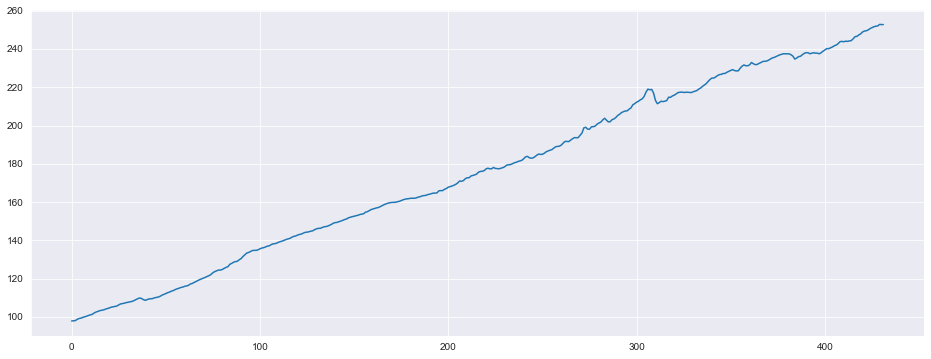

In [7]:
df['CPI'].plot()
plt.show()

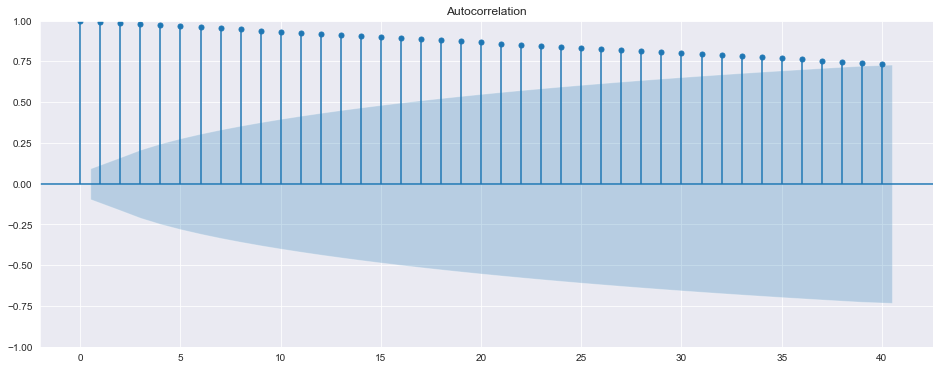

In [9]:
sm.graphics.tsa.plot_acf(df['CPI'].values.squeeze(), lags = 40)
plt.show()

### Calculate Inflation Variables

In [10]:
df['infl'] = df['CPI'].diff(periods = 12) / df['CPI'].shift(12)

In [11]:
df.head(12)

,month,CPI,infl
0,Jan 1983,97.9,NaN
1,Feb 1983,98.0,NaN
2,Mar 1983,98.1,NaN
3,Apr 1983,98.8,NaN
4,May 1983,99.2,NaN
5,Jun 1983,99.4,NaN
6,Jul 1983,99.8,NaN
7,Aug 1983,100.1,NaN
8,Sep 1983,100.4,NaN
9,Oct 1983,100.8,NaN


In [12]:
df.tail(12)

,month,CPI,infl
420,Jan 2018,248.884,0.020937
421,Feb 2018,249.369,0.022167
422,Mar 2018,249.498,0.023586
423,Apr 2018,249.956,0.024196
424,May 2018,250.646,0.027398
425,Jun 2018,251.134,0.028471
426,Jul 2018,251.597,0.029490
427,Aug 2018,251.879,0.026833
428,Sep 2018,252.010,0.022693
429,Oct 2018,252.794,0.025172


### Plots & ACF Plots for CPI

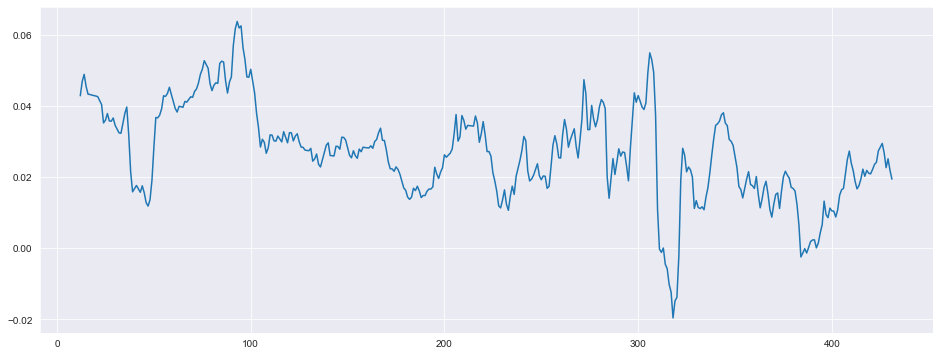

In [13]:
df['infl'].plot()
plt.show()

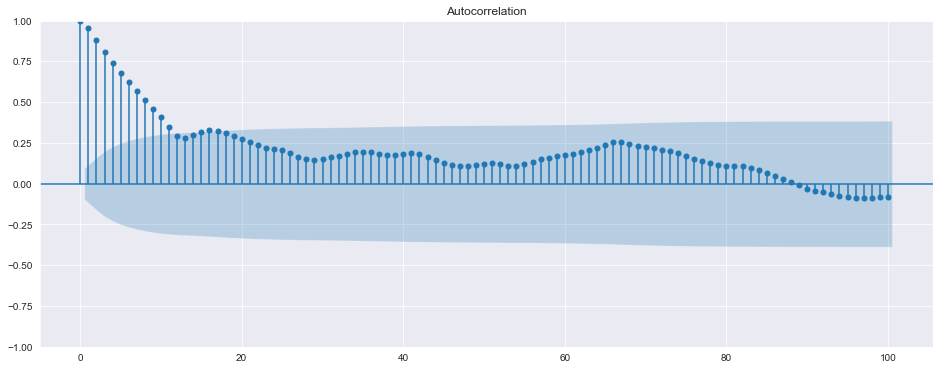

In [16]:
sm.graphics.tsa.plot_acf(df['infl'].dropna().values.squeeze(), lags = 100)
plt.show()